# Estudo sobre as eleições municipais de 2020 e 2024 no estado de Minas Gerais

## Instalando e importando os pacotes necessários

In [181]:
!pip install plotly geopandas matplotlib pandas

In [182]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

## Definindo arquivos necessários e váriaveis globais 

In [183]:
# Caminho para os arquivos utilizados
pasta = 'C:\\Users\\marce\\OneDrive\\Área de Trabalho\\analise_eleitoral\\'
arquivo_resultado_2020 = os.path.join(pasta, 'votacao_2020.csv')
arquivo_resultado_2024 = os.path.join(pasta, 'votacao_2024.csv')
arquivo_partidos = os.path.join(pasta,'partidos.csv')
arquivo_municipios = 'C:\\Users\\marce\\OneDrive\\Área de Trabalho\\analise_eleitoral\\brasil-municipios.csv'

In [184]:
# Alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [185]:
# Lendo os dados dos arquivos
tabela_arquivo_2020 = pd.read_csv(arquivo_resultado_2020, sep=';', encoding = "ISO-8859-1")
tabela_arquivo_2024 = pd.read_csv(arquivo_resultado_2024, sep=';', encoding = "ISO-8859-1")
tabela_partidos = pd.read_csv(arquivo_partidos, sep=';')

In [186]:
tabela_arquivo_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10411 entries, 0 to 10410
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   DT_GERACAO                      10411 non-null  object
 1   HH_GERACAO                      10411 non-null  object
 2   ANO_ELEICAO                     10411 non-null  int64 
 3   CD_TIPO_ELEICAO                 10411 non-null  int64 
 4   NM_TIPO_ELEICAO                 10411 non-null  object
 5   NR_TURNO                        10411 non-null  int64 
 6   CD_ELEICAO                      10411 non-null  int64 
 7   DS_ELEICAO                      10411 non-null  object
 8   DT_ELEICAO                      10411 non-null  object
 9   TP_ABRANGENCIA_ELEICAO          10411 non-null  object
 10  SG_UF                           10411 non-null  object
 11  SG_UE                           10411 non-null  int64 
 12  NM_UE                           10411 non-null

In [187]:
# Funções

def processar_candidatos_mais_votados(tabela_arquivo):
    return tabela_arquivo\
        .sort_values(by='NM_UE', ascending=False)\
        .groupby(['NM_PARTIDO', 'NM_UE'])\
        .agg({'QT_VOTOS_NOMINAIS_VALIDOS': 'first', 'NR_PARTIDO': 'first'})\
        .reset_index()

def gerar_grafico_partidos_mais_votados(df, ano):
    # Agrupar os dados por partido e contar o número de municípios em que cada partido venceu
    votos_por_partido = df.groupby('NM_PARTIDO')['QT_VOTOS_NOMINAIS_VALIDOS'].count().reset_index()
    votos_por_partido = votos_por_partido.sort_values(by='QT_VOTOS_NOMINAIS_VALIDOS', ascending=False)

    # Gerar o gráfico de barras
    fig = px.bar(votos_por_partido, 
                 x='NM_PARTIDO', 
                 y='QT_VOTOS_NOMINAIS_VALIDOS', 
                 title=f'Partidos mais votados em {ano}',
                 labels={'QT_VOTOS_NOMINAIS_VALIDOS': 'Número de Municípios', 'NM_PARTIDO': 'Partido'},
                 color='NM_PARTIDO')

    fig.show()

In [188]:
candidatos_mais_votados_2020 = processar_candidatos_mais_votados(tabela_arquivo_2020)

In [189]:
display(candidatos_mais_votados_2020)

,NM_PARTIDO,NM_UE,QT_VOTOS_NOMINAIS_VALIDOS,NR_PARTIDO
0,AVANTE,AIMORÉS,627,70
1,AVANTE,ALBERTINA,456,70
2,AVANTE,ALFENAS,1953,70
3,AVANTE,ALFREDO VASCONCELOS,672,70
4,AVANTE,ALTEROSA,2707,70
...,...,...,...,...
6264,Solidariedade,ÁGUAS VERMELHAS,76,77
6265,Unidade Popular,BELO HORIZONTE,726,80
6266,Unidade Popular,ITABIRITO,477,80
6267,Unidade Popular,NOVA LIMA,764,80


In [190]:
candidatos_mais_votados_2024 = processar_candidatos_mais_votados(tabela_arquivo_2024)

In [191]:
display(candidatos_mais_votados_2024)

,NM_PARTIDO,NM_UE,QT_VOTOS_NOMINAIS_VALIDOS,NR_PARTIDO
0,AGIR,ALPINÓPOLIS,752,36
1,AGIR,ALVINÓPOLIS,758,36
2,AGIR,ANDRADAS,1186,36
3,AGIR,ARAXÁ,2387,36
4,AGIR,ARCOS,2288,36
...,...,...,...,...
8362,União Brasil,VIRGINÓPOLIS,526,44
8363,União Brasil,VIRGÍNIA,704,44
8364,União Brasil,VISCONDE DO RIO BRANCO,2103,44
8365,União Brasil,VIÇOSA,16346,44


## Gráficos dos partidos mais votados nos anos de 2020 e 2024

In [192]:
gerar_grafico_partidos_mais_votados(candidatos_mais_votados_2020, 2020)

In [193]:
gerar_grafico_partidos_mais_votados(candidatos_mais_votados_2024, 2024)

## Unindo as tabelas dos candidatos e dos partidos
### Assim podemos definir quais candidatos são de direita, esquerda ou centro

In [194]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)
tabela_partidos['Espectro'] = tabela_partidos['Espectro'].astype(espec_type)

In [195]:
candidatos_mais_votados_2020 = candidatos_mais_votados_2020.\
merge(tabela_partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [196]:
candidatos_mais_votados_2024 = candidatos_mais_votados_2024.\
merge(tabela_partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

## Quem venceu mais: Esquerda ou Direita?


In [197]:
!pip install pyogrio

In [198]:
df = pd.read_csv(arquivo_municipios)

In [199]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude)
)

In [220]:
df_mg = df[df['codigo_uf'] == 31]

# Converter ambos para string, por exemplo
df_mg.loc[:, 'nome'] = df_mg['nome'].astype(str)
candidatos_mais_votados_2024.loc[:, 'NM_UE'] = candidatos_mais_votados_2024['NM_UE'].astype(str)

# Usar .loc[] para modificar o campo 'nome' diretamente no DataFrame original
df_mg.loc[:, 'nome'] = df_mg['nome'].str.upper()

# Verificar se a conversão para maiúsculo foi aplicada
print(df_mg['nome'].head())


1     ABADIA DOS DOURADOS
3                  ABAETÉ
12             ABRE CAMPO
15                ACAIACA
29                AÇUCENA
Name: nome, dtype: object


In [231]:
candidatos_mais_votados_2020_geo_df = df_mg.merge(candidatos_mais_votados_2020, left_on='nome', right_on='NM_UE')
candidatos_mais_votados_2024_geo_df = df_mg.merge(candidatos_mais_votados_2024, left_on='nome', right_on='NM_UE')

NameError: name 'candidatos_mais_votados_2016_geo_df' is not defined

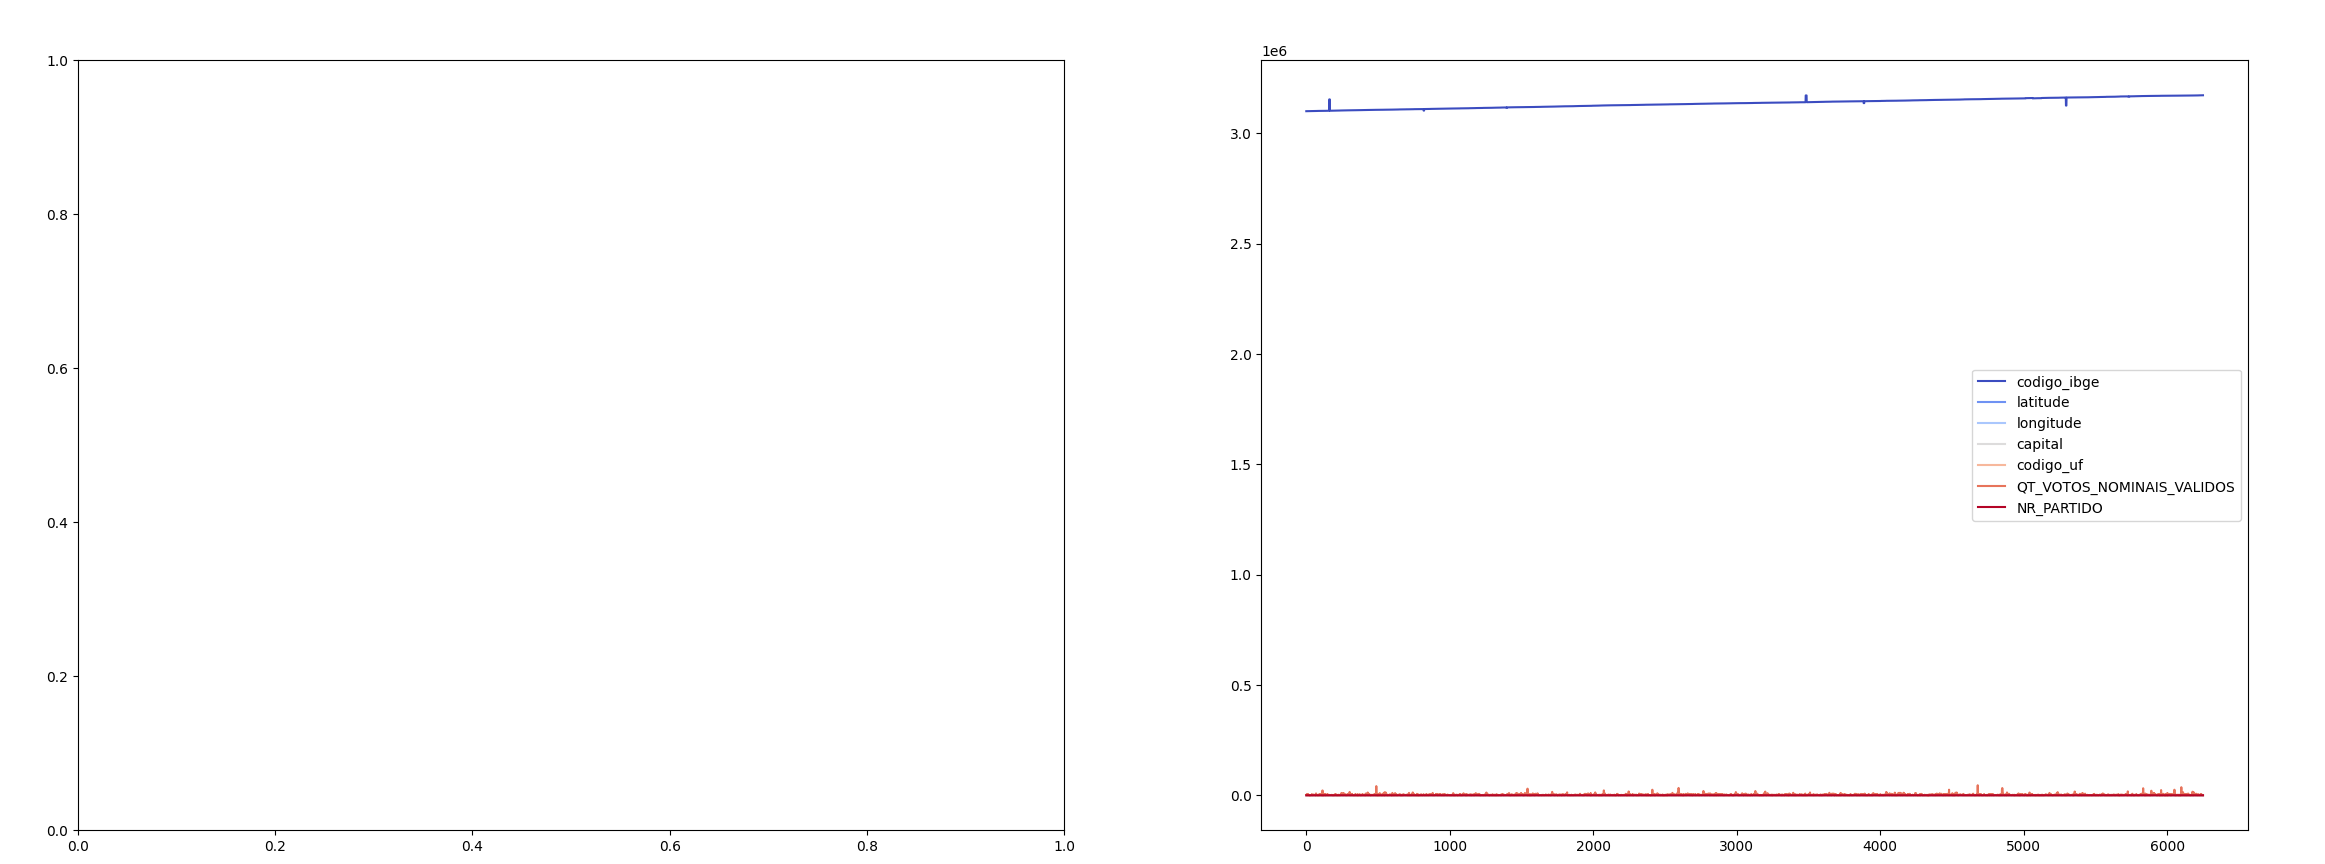

In [233]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados estado de Minas Gerais 2020 (Prefeito)', color='white', size=26)
ax[1].set_title(f'Espectro Mais Votados estado de Minas Gerais 2024 (Prefeito)', color='white', size=26)

candidatos_mais_votados_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0]);
     